In [2]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os
import cv2
import nibabel as nib
from PIL import Image
from model.concave_dps_w import ResUNet as resu
import torch

In [91]:
model = resu(3,4)

In [92]:
resunet_checkpoint = torch.load('/zion/fangx2/mu_or/tmp/sf_uni4_1206_lr_2e-4/resu_best_axial.pth.tar')
resunet_dict = resunet_checkpoint['state_dict']
model.load_state_dict(resunet_dict)

<All keys matched successfully>

In [370]:
from torch.autograd import Variable
import torch.nn.functional as F
import nibabel = nib

vol24 = nib.load('/zion/fangx2/BTCV/training_256/volume-24.nii')
a = vol24.get_data()
a = a.transpose(2,0,1)
print(a.max(),a.min())
img24 = a[94:97, 16:240, 16:240]
print(img24.shape)
img24[img24 > 200] = 200.0
img24[img24 < -200] = -200.0
print(img24.shape)
img24 = img24[np.newaxis,:,:,:]
print(img24.shape)
img24 = Variable(torch.from_numpy(img24), volatile=True).float()
img24 = img24.cuda()
model.cuda()
output5, output4, output3, output2, output1 = model.resnet(img24)
output6 = model(img24)

In [310]:
attmap(output5).shape

torch.Size([224, 224])

(224, 224)


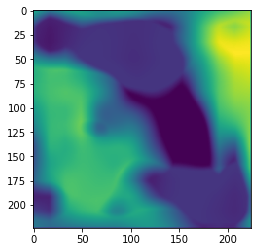

In [333]:
plt.imshow(attmap(output5))

In [473]:
def pmap(output):
    #output = F.softmax(output,dim=1)
    # output = torch.sigmoid(output)
    output = output.cpu().data.numpy()
    
    out = np.squeeze(output)
    out = out[1:]
    out = out.transpose(2,1,0)
    # out[out>1] = 1
    # out[out<0] = 0
    # fi_out = (out - out.min()) / (out.max() - out.min())
    #out = out.astype(np.uint8)
    return out
def attmap(output):
    w_map = model.att(output)
    w_map = w_map.cpu().data.numpy()
    w_map = np.squeeze(w_map)
    print(w_map.shape)
    w_map = w_map.transpose(1,0)
    #w_map = w_map.astype(np.uint8)
    return w_map
def imap(img):
    img = img.cpu().data.numpy()
    img = np.squeeze(img)
    img = img.transpose(2,1,0)
    img = (img + 200) / 400 * 255
    return img

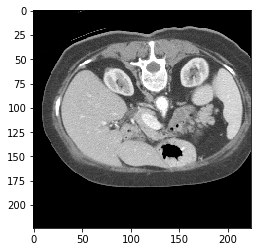

In [344]:
plt.imshow(imap(img24)[:,:,1],cmap = 'gray')

In [521]:
I1 = imap(img24)[:,:,1]
I2 = np.stack((I1/255,I1/255,I1/255), -1)
I2.max()

1.0

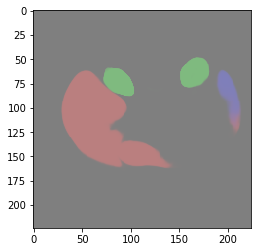

In [524]:
plt.imshow(pmap(F.softmax(fi_out,dim=1)))

In [530]:
I4 = pmap(F.softmax(fi_out,dim=1))

In [572]:
I5 = 0.4*I2 + 1*I4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


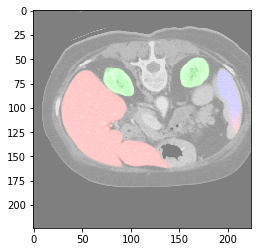

In [574]:
plt.imshow(I5, cmap = 'gray')

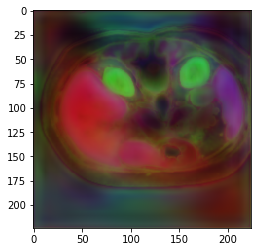

In [501]:
plt.imshow(pmap(0.1*fi_out))

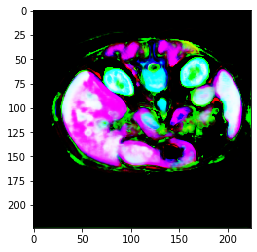

In [441]:
plt.imshow(pmap(output1))

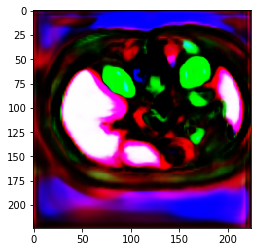

In [442]:
plt.imshow(pmap(output2))

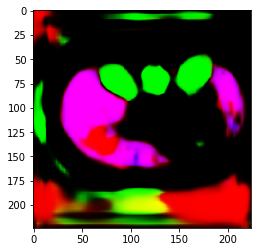

In [443]:
plt.imshow(pmap(output3))

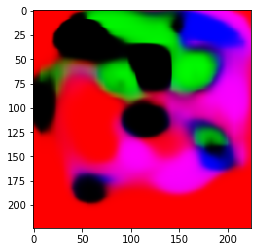

In [444]:
plt.imshow(pmap(output4))

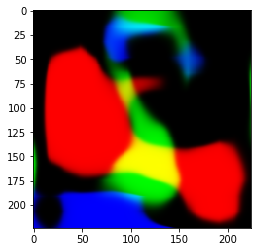

In [445]:
plt.imshow(pmap(output5))

In [446]:
fi_out.shape

torch.Size([1, 4, 224, 224])

In [434]:
pmap(fi_out).shape

(224, 224, 3)

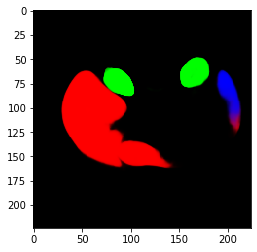

In [337]:
plt.imshow(pmap(output6))

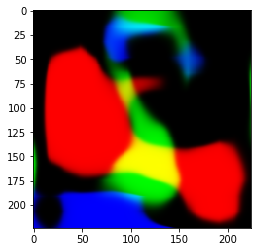

In [438]:
plt.imshow(pmap(output5))

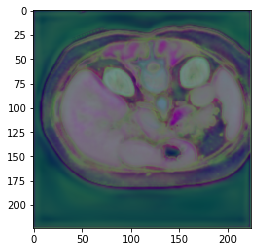

In [410]:
plt.imshow(pmap(a),cmap = 'jet')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


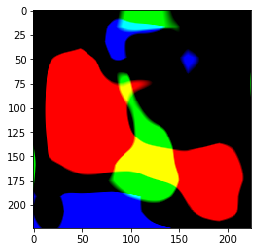

In [415]:
plt.imshow(pmap(output5),cmap = 'jet')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


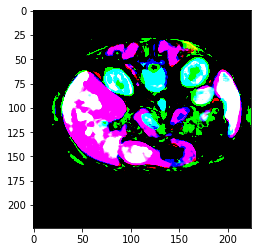

In [403]:
plt.imshow(pmap(output1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


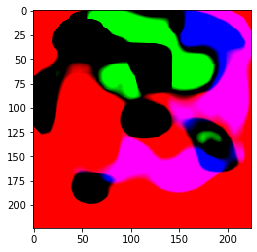

In [379]:
plt.imshow(pmap(output4))